In [1]:
from collections import Counter
import random
from sklearn.metrics import precision_recall_curve, auc
from sklearn.preprocessing import label_binarize

from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt
import joblib
import numpy as np
import pandas as pd

from data_manipulation.reading_util import load_all_sub_classes, load_ml_data_emb
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

import os
from dotenv import load_dotenv
from data_manipulation.reading_util import load_non_enz_esm2
from metrics_helper_funcs.validation_tools import plot_bootstrapped_score, plot_confiusion_matrix, calculate_micro_f1, calculate_accuracy, calculate_macro_f1, calculate_weighted_f1, calculate_macro_recall, calculate_macro_precision, calculate_mcc_score

load_dotenv()



2023-12-17 10:26:16.262019: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-17 10:26:17.198799: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


True

In [2]:
comp_ec_to_label = {
    "1.1": 0,
    "1.2": 1,
    "1.3": 2,
    "1.4": 3,
    "1.5": 4,
    "1.6": 5,
    "1.7": 6,
    "1.8": 7,
    "1.11": 8,
    "1.12": 9,
    "1.13": 10,
    "1.14": 11,
    "1.15": 12,
    "1.16": 13,
    "1.17": 14,
    "1.18": 15,
    "1.21": 16,
    "1.10": 17,
    "1.20": 17,
    "1.23": 17,
    "1.97": 17,
    "2.1": 18,
    "2.3": 19,
    "2.4": 20,
    "2.5": 21,
    "2.6": 22,
    "2.7": 23,
    "2.8": 24,
    "2.2": 25,
    "2.9": 25,
    "2.10": 25,
    "3.1": 26,
    "3.2": 27,
    "3.4": 28,
    "3.5": 29,
    "3.6": 30,
    "3.3": 31,
    "3.7": 31,
    "3.8": 31,
    "3.9": 31,
    "3.11": 31,
    "3.13": 31,
    "4.1": 32,
    "4.2": 33,
    "4.3": 34,
    "4.4": 35,
    "4.6": 36,
    "4.99": 37,
    "4.7": 37,
    "4.5": 37,
    "5.1": 38,
    "5.2": 39,
    "5.3": 40,
    "5.4": 41,
    "5.5": 42,
    "5.6": 43,
    "5.7": 43,
    "5.99": 43,
    "6.1": 44,
    "6.2": 45,
    "6.3": 46,
    "6.5": 47,
    "6.4": 47,
    "6.6": 47,
    "7.1": 48,
    "7.2": 49,
    "7.3": 50,
    "7.4": 50,
    "7.5": 50,
    "7.6": 50,
}

comp_label_to_ec = {
    0: "1.1" ,
    1: "1.2" ,
    2: "1.3" ,
    3: "1.4" ,
    4: "1.5" ,
    5: "1.6" ,
    6: "1.7" ,
    7: "1.8" ,
    8: "1.11" ,
    9: "1.12" ,
    10: "1.13" ,
    11: "1.14" ,
    12: "1.15" ,
    13: "1.16" ,
    14: "1.17" ,
    15: "1.18" ,
    16: "1.21" ,
    17: "1.10_20_23_97" ,
    18: "2.1" ,
    19: "2.3" ,
    20: "2.4" ,
    21: "2.5" ,
    22: "2.6" ,
    23: "2.7" ,
    24: "2.8" ,
    25: "2.2_9_19" ,
    26: "3.1" ,
    27: "3.2" ,
    28: "3.4" ,
    29: "3.5" ,
    30: "3.6" ,
    31: "3.3_7_8_9_11_13" ,
    32: "4.1" ,
    33: "4.2" ,
    34: "4.3" ,
    35: "4.4" ,
    36: "4.6" ,
    37: "4.99_7_5" ,
    38: "5.1" ,
    39: "5.2" ,
    40: "5.3" ,
    41: "5.4" ,
    42: "5.5" ,
    43: "5.6_7_99" ,
    44: "6.1" ,
    45: "6.2" ,
    46: "6.3" ,
    47: "6.5_4_6" ,
    48: "7.1" ,
    49: "7.2" ,
    50: "7.3_4_5_6" ,
}



comp_ec_to_label_non_ez = {
    "1.1": 0,
    "1.2": 1,
    "1.3": 2,
    "1.4": 3,
    "1.5": 4,
    "1.6": 5,
    "1.7": 6,
    "1.8": 7,
    "1.11": 8,
    "1.12": 9,
    "1.13": 10,
    "1.14": 11,
    "1.15": 12,
    "1.16": 13,
    "1.17": 14,
    "1.18": 15,
    "1.21": 16,
    "1.10": 17,
    "1.20": 17,
    "1.23": 17,
    "1.97": 17,
    "2.1": 18,
    "2.3": 19,
    "2.4": 20,
    "2.5": 21,
    "2.6": 22,
    "2.7": 23,
    "2.8": 24,
    "2.2": 25,
    "2.9": 25,
    "2.10": 25,
    "3.1": 26,
    "3.2": 27,
    "3.4": 28,
    "3.5": 29,
    "3.6": 30,
    "3.3": 31,
    "3.7": 31,
    "3.8": 31,
    "3.9": 31,
    "3.11": 31,
    "3.13": 31,
    "4.1": 32,
    "4.2": 33,
    "4.3": 34,
    "4.4": 35,
    "4.6": 36,
    "4.99": 37,
    "4.7": 37,
    "4.5": 37,
    "5.1": 38,
    "5.2": 39,
    "5.3": 40,
    "5.4": 41,
    "5.5": 42,
    "5.6": 43,
    "5.7": 43,
    "5.99": 43,
    "6.1": 44,
    "6.2": 45,
    "6.3": 46,
    "6.5": 47,
    "6.4": 47,
    "6.6": 47,
    "7.1": 48,
    "7.2": 49,
    "7.3": 50,
    "7.4": 50,
    "7.5": 50,
    "7.6": 50,
    "Non enzyme":51
}


comp_label_to_ec_non_ez = {
    0: "1.1" ,
    1: "1.2" ,
    2: "1.3" ,
    3: "1.4" ,
    4: "1.5" ,
    5: "1.6" ,
    6: "1.7" ,
    7: "1.8" ,
    8: "1.11" ,
    9: "1.12" ,
    10: "1.13" ,
    11: "1.14" ,
    12: "1.15" ,
    13: "1.16" ,
    14: "1.17" ,
    15: "1.18" ,
    16: "1.21" ,
    17: "1.10|20|23|97" ,
    18: "2.1" ,
    19: "2.3" ,
    20: "2.4" ,
    21: "2.5" ,
    22: "2.6" ,
    23: "2.7" ,
    24: "2.8" ,
    25: "2.2|9|19" ,
    26: "3.1" ,
    27: "3.2" ,
    28: "3.4" ,
    29: "3.5" ,
    30: "3.6" ,
    31: "3.3|7|8|9|11|13" ,
    32: "4.1" ,
    33: "4.2" ,
    34: "4.3" ,
    35: "4.4" ,
    36: "4.6" ,
    37: "4.99|7|5" ,
    38: "5.1" ,
    39: "5.2" ,
    40: "5.3" ,
    41: "5.4" ,
    42: "5.5" ,
    43: "5.6|7|99" ,
    44: "6.1" ,
    45: "6.2" ,
    46: "6.3" ,
    47: "6.5|4|6" ,
    48: "7.1" ,
    49: "7.2" ,
    50: "7.3|4|5|6" ,
    51: "Non enzyme"
}




In [3]:
print(len(comp_ec_to_label_non_ez))

71


In [4]:
# Random level 0 pred
def random_level_0(y):
    file_path = "/home/malte/01_Documents/projects/pbl_binary_classifier/tf_cnn_esm2/only_enzyme_models/y_train_level_0_lables.txt"
    with open(file_path, 'r') as file:
        y_train = np.array([int(line.strip()) for line in file])

        count_dict = Counter(y_train)
        predictions = [random.choices(list(count_dict.keys()), weights=count_dict.values())[0] for _ in y]
        return np.array(predictions)


In [5]:
# Random level 1 pred
def random_level_1(y):
    file_path = "/home/malte/01_Documents/projects/pbl_binary_classifier/tf_cnn_esm2/only_enzyme_models/y_train_level_1_lables.txt"
    with open(file_path, 'r') as file:
        y_train = np.array([int(line.strip()) for line in file])

        count_dict = Counter(y_train)
        predictions = [random.choices(list(count_dict.keys()), weights=count_dict.values())[0] for _ in y]
        return np.array(predictions)


In [6]:
# Random level 2 pred
def random_level_2(y):
    file_path = "/home/malte/01_Documents/projects/pbl_binary_classifier/tf_cnn_esm2/2nd_ec_class_pred/y_train_subclass_lables.txt"
    with open(file_path, 'r') as file:
        y_train = np.array([int(line.strip()) for line in file])

        count_dict = Counter(y_train)
        predictions = [random.choices(list(count_dict.keys()), weights=count_dict.values())[0] for _ in y]
        return np.array(predictions)

    # count_dict = Counter(comp_label_to_ec.keys())
    # print(count_dict)
    # predictions = []

    # for key in count_dict.keys():
    #     count_dict[key] /= len(y)
    # print(count_dict)

    # for _ in y:
    #     predicted_label = random.choices(list(count_dict.keys()), weights=count_dict.values())[0]
    #     predictions.append(predicted_label)
    # 
    # return np.array(predictions)



In [7]:
def validate_on_test_data_v1(path_to_test_csv: str, path_to_test_esm2: str,
                          path_to_non_ez_fasta: str, path_to_non_ez_esm2: str,
                          path_to_multiclass_model, path_to_binaryclass_model):

    print("\n\n\t\t\t\033[34m[ LOADING DATA AND MODELS ]\033[0m\n\n\t\t\t")
   
    # Load model and test data
    multiclass_model = tf.keras.models.load_model(path_to_multiclass_model)
    multiclass_model_all_samples = tf.keras.models.load_model("/home/malte/01_Documents/projects/pbl_binary_classifier/tf_cnn_esm2/2nd_ec_class_pred/Models/1512_all_non_ez_level_2_v2.keras")
    
    level_one_model = tf.keras.models.load_model("/home/malte/01_Documents/projects/pbl_binary_classifier/tf_cnn_esm2/enzyme_non_enzyme_models/1512_opt_less_nodes_2_weighted.keras")
    
    binaryclass_model = tf.keras.models.load_model(path_to_binaryclass_model)

    # loead enzymes
    X_enzymes, y_enzymes, label_to_ec = load_all_sub_classes(path_to_esm2=path_to_test_esm2, path_to_enzyme_csv=path_to_test_csv, allowed_labels=comp_ec_to_label_non_ez)
    
    # Load non_enzymes
    X_non_enzymes, _ = load_non_enz_esm2(non_enzymes_fasta_path=path_to_non_ez_fasta,
                                         non_enzymes_esm2_path=path_to_non_ez_esm2)
    del _
    



    y_non_enzymes = np.array([51 for _ in range(len(X_non_enzymes))])


    X_multiclass_1 = np.vstack((X_enzymes, X_non_enzymes))
    y_multiclass_1 = np.hstack((y_enzymes, y_non_enzymes))
    
    
    # depending on the model, the labels for non enzymes change
    y_non_enzymes = np.array([0 for _ in range(len(X_non_enzymes))])
    y_non_enzymes_level_one = np.array([7 for _ in range(len(X_non_enzymes))])


    # read data and labels for level one (including none enzymes
    _, y_level_one = load_ml_data_emb(path_to_esm2=emb_path, path_to_enzyme_csv=csv_path)
    y_level_one = np.hstack((y_level_one, y_non_enzymes_level_one))

    # X_non_enzymes = X_non_enzymes[:1000] 
    # y_non_enzymes = y_non_enzymes[:1000] 

    # Combine data
    X_binary = np.vstack((X_enzymes, X_non_enzymes))
    y_binary = [1 for _ in y_enzymes]
    y_binary.extend(y_non_enzymes)
    y_binary = np.array(y_binary)

    del y_non_enzymes
    del X_non_enzymes
    # Plot input data
    y_sorted = y_enzymes.copy()
    y_sorted.sort()

    print("\n\n\t\t\t\033[34m[ PLOTTING INPUT DISTRIBUTION ]\033[0m\n\n\t\t\t")
    
    # Plot fore level 0
    sns.set_palette("colorblind")
    sns.set("poster")
    plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
    sns.set_style("whitegrid")
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)

    countplot = sns.countplot(x=y_binary)
    countplot.set_xticklabels(countplot.get_xticklabels())

    plt.xticks([0, 1], ["Non Enzyme", "Enzyme"])


    # Add labels and title
    plt.title("Label distribution Level 0", fontsize=18)
    plt.xlabel("Labels", fontsize=15)
    plt.ylabel("Count", fontsize=15)

    # Show the plot
    plt.show()

    # plot for level 1 no scale
    sns.set_palette("colorblind")
    sns.set("poster")
    plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
    sns.set_style("whitegrid")
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)

    countplot = sns.countplot(x=y_level_one)
    countplot.set_xticklabels(countplot.get_xticklabels())
    plt.xticks([0, 1, 2, 3, 4, 5, 6, 7], ["1.x", "2.x", "3.x", "4.x", "5.x", "6.x", "7.x", "Non Enzyme"])

    # Add labels and title
    plt.title("Label distribution Level 1", fontsize=18)
    plt.xlabel("Labels", fontsize=15)
    plt.ylabel("Count", fontsize=15)

    # Show the plot
    plt.show()

    # Plot fore level 1 scale
    sns.set_palette("colorblind")
    sns.set("poster")
    plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
    sns.set_style("whitegrid")
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    countplot = sns.countplot(x=y_level_one)
    countplot.set_xticklabels(countplot.get_xticklabels())
    plt.xticks([0, 1, 2, 3, 4, 5, 6, 7], ["1.x", "2.x", "3.x", "4.x", "5.x", "6.x", "7.x", "Non Enzyme"])
    plt.yscale('log')

    # Add labels and title
    plt.title("Label distribution Level 1 (logarithmic scale)", fontsize=18)
    plt.xlabel("Labels", fontsize=15)
    plt.ylabel("Count", fontsize=15)

    # Show the plot
    plt.show()

    plt.figure(figsize=(10, 6))
    # plot with log scale
    sns.set_palette("colorblind")
    sns.set("poster")
    sns.set_style("whitegrid")
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)

    countplot = sns.countplot(x=y_multiclass_1)
    countplot.set_xticklabels(countplot.get_xticklabels(), rotation=90)

    
    # Set logarithmic scale on y-axis
    plt.yscale('log')

    xticks = range(0,33)
    mapped_xticks = ['1.1.x', '1.2.x', '1.3.x', '1.5.x', '1.6.x', '1.11.x', '1.13.x', '1.14.x', '1.16.x', '2.1.x', '2.3.x', '2.4.x', '2.5.x', '2.6.x', '2.7.x', '2.8.x', '3.1.x', '3.2.x', '3.4.x', '3.5.x', '3.6.x', '3.3|7|8|9|11|13.x', '4.1.x', '4.2.x', '4.3.x', '5.1.x', '5.3.x', '5.4.x', '6.2.x', '6.3.x', '7.1.x', '7.2.x', 'Non Enzyme']
    plt.xticks(xticks, mapped_xticks, rotation='vertical')
    # Add labels and title
    plt.title("Label distribution level 2 (logarithmic scale)", fontsize=18)
    plt.xlabel("Count", fontsize=11)
    plt.ylabel("Labels", fontsize=11)

    plt.show()


    sns.set_palette("colorblind")
    sns.set("poster")
    plt.figure(figsize=(10, 6))
    sns.set_style("whitegrid")
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)

    countplot = sns.countplot(x=y_multiclass_1)
    countplot.set_xticklabels(countplot.get_xticklabels(), rotation=90)


    xticks = range(0,33)
    mapped_xticks = ['1.1.x', '1.2.x', '1.3.x', '1.5.x', '1.6.x', '1.11.x', '1.13.x', '1.14.x', '1.16.x', '2.1.x', '2.3.x', '2.4.x', '2.5.x', '2.6.x', '2.7.x', '2.8.x', '3.1.x', '3.2.x', '3.4.x', '3.5.x', '3.6.x', '3.3|7|8|9|11|13.x', '4.1.x', '4.2.x', '4.3.x', '5.1.x', '5.3.x', '5.4.x', '6.2.x', '6.3.x', '7.1.x', '7.2.x', 'Non Enzyme']

    # Add labels and title
    plt.title("Preprocessed labels for multiclass FNN", fontsize=18)
    plt.xlabel("Labels", fontsize=11)
    plt.ylabel("Count", fontsize=11)
    plt.xticks(xticks, mapped_xticks, rotation='vertical')

    # Show the plot
    plt.show()
    print("\n\n\t\t\t\033[34m[ MAKING PREDICTIONS ]\033[0m\n\n\t\t\t")


    level_0_pred = binaryclass_model.predict(X_binary) > 0.5
    level_1_pred = np.argmax(level_one_model.predict(X_binary), axis=-1)
    level_2_pred = np.argmax(multiclass_model.predict(X_multiclass_1), axis=-1)
    level_2_pred_all_samples = np.argmax(multiclass_model_all_samples.predict(X_multiclass_1), axis=-1)

    print("\n\n\t\t\t\033[34m[ MAKING BASELINE PREDICTION ]\033[0m\n\n\t\t\t")

    # random baseline predictions
    random_baseline_level_0_pred = random_level_0(y_binary)
    random_baseline_level_1_pred = random_level_1(y_binary)
    random_baseline_level_2_pred = random_level_2(y_multiclass_1)

    print("\n\n\t\t\t\033[34m[ PLOTTING CONFUSION MATRIX ]\033[0m\n\n\t\t\t")

    # level 0
    plot_confiusion_matrix(y_true=y_binary, y_pred=level_0_pred, plot_title="Level 0 FNN", lable_size=10)
    plot_confiusion_matrix(y_true=y_binary, y_pred=random_baseline_level_0_pred, plot_title="Level 0 Baseline", lable_size=10)

    # level 1
    plot_confiusion_matrix(y_true=y_level_one, y_pred=level_1_pred, plot_title="Level 1 FNN", lable_size=10)

    plot_confiusion_matrix(y_true=y_level_one, y_pred=random_baseline_level_1_pred, plot_title="Level 1 Baseline", lable_size=10)
    

    # level 2
    conf_matrix = confusion_matrix(y_multiclass_1, level_2_pred)
    row_sums = conf_matrix.sum(axis=1)
    conf_matrix_percent = (conf_matrix.T / row_sums).T * 100
    plt.figure(figsize=(10, 7))
    heatmap = sns.heatmap(conf_matrix_percent, annot=False, fmt=".2f", cmap="binary", cbar=False)
    heatmap.set_xticks([])
    heatmap.set_yticks([])
    plt.xlabel("Predicted", fontsize=12)
    plt.ylabel("Actual", fontsize=12)
    plt.title("Confusion Matrix\n(under-sampled)", fontsize=12)
    plt.show()

    conf_matrix = confusion_matrix(y_multiclass_1, level_2_pred_all_samples)
    row_sums = conf_matrix.sum(axis=1)
    conf_matrix_percent = (conf_matrix.T / row_sums).T * 100
    plt.figure(figsize=(10, 7))
    heatmap = sns.heatmap(conf_matrix_percent, annot=False, fmt=".2f", cmap="binary", cbar=False)
    heatmap.set_xticks([])
    heatmap.set_yticks([])
    plt.xlabel("Predicted", fontsize=12)
    plt.ylabel("Actual", fontsize=12)
    plt.title("Confusion Matrix\nFNN Level 2", fontsize=12)
    plt.show()


    conf_matrix = confusion_matrix(y_multiclass_1, random_baseline_level_2_pred)
    row_sums = conf_matrix.sum(axis=1)
    conf_matrix_percent = (conf_matrix.T / row_sums).T * 100
    plt.figure(figsize=(10, 7))
    heatmap = sns.heatmap(conf_matrix_percent, annot=False, fmt=".2f", cmap="binary", cbar=False)
    heatmap.set_xticks([])
    heatmap.set_yticks([])
    plt.xlabel("Predicted", fontsize=12)
    plt.ylabel("Actual", fontsize=12)
    plt.title("Confusion Matrix Baseline", fontsize=12)
    plt.show()

    print("\n\n\t\t\t\033[34m[ PLOTTING SCORES ]\033[0m\n\n\t\t\t")
    

    # Assuming y_true and y_pred are your true labels and predicted probabilities respectively for multiclass classification


    # all
    plot_bootstrapped_score(
        y_trues=[y_binary, y_binary, y_level_one, y_level_one, y_multiclass_1, y_multiclass_1], 
        y_preds=[level_0_pred, random_baseline_level_0_pred, level_1_pred, random_baseline_level_1_pred, level_2_pred_all_samples, random_baseline_level_2_pred], 
        scoring_funcs=[calculate_weighted_f1, calculate_accuracy, calculate_macro_f1, calculate_mcc_score], model_names=["FNN Level 0","Baseline Level 0", "FNN Level 1", "Baseline Level 1 ", "FNN Level 2", "Baseline Level 2"])

    # level 0 only
    plot_bootstrapped_score(y_trues=[y_binary, y_binary], y_preds=[level_0_pred, random_baseline_level_0_pred], scoring_funcs=[calculate_weighted_f1, calculate_macro_f1, calculate_micro_f1, calculate_accuracy, calculate_macro_recall, calculate_macro_precision, calculate_mcc_score], model_names=["FNN Level 0","Baseline Level 0"], plot_title="Level 0 performance")

    # level one only
    plot_bootstrapped_score(y_trues=[y_level_one, y_level_one], y_preds=[level_1_pred, random_baseline_level_1_pred], scoring_funcs=[calculate_weighted_f1, calculate_macro_f1, calculate_micro_f1, calculate_accuracy, calculate_mcc_score], model_names=["FNN Level 1", "Baseline Level 1"], plot_title="Level 1 performance")
    
    # level two only
    plot_bootstrapped_score(y_trues=[y_multiclass_1, y_multiclass_1, y_multiclass_1], y_preds=[level_2_pred, random_baseline_level_2_pred, level_2_pred_all_samples], scoring_funcs=[calculate_weighted_f1, calculate_macro_f1, calculate_micro_f1, calculate_accuracy, calculate_mcc_score], model_names=["FNN Level 2 (under-sampled)","Baseline Level 2", "FNN Level 2 (*)"], plot_title="Level 2 performance")
    



In [8]:
bin_class_path = "/home/malte/01_Documents/projects/pbl_binary_classifier/tf_cnn_esm2/enzyme_non_enzyme_models/1512_fnn_bin_v1.keras"
# bin_class_path = "/home/malte/01_Documents/projects/pbl_binary_classifier/random_forest/random_forest_esm2.joblib"


mul_class_path = "/home/malte/01_Documents/projects/pbl_binary_classifier/tf_cnn_esm2/2nd_ec_class_pred/Models/1512_5000_non_ez_level_2_v1.keras"

emb_path = os.getenv("TEST_ESM2_ENZYMES")
csv_path = os.getenv("TEST_CSV_ENZYMES")

fasta_path = os.getenv("TEST_FASTA_NON_ENZYMES")
emb_non_ez_path = os.getenv("TEST_ESM2_NON_ENZYMES")



			[ LOADING DATA AND MODELS ]

			
LOG:
 0 Sequences with aa O in /home/malte/Desktop/Dataset/Test_Data/all.csv
LOG:
 0 Sequences with aa U in /home/malte/Desktop/Dataset/Test_Data/all.csv
LOG:
 4 multifunctional enzymes with diff ec main classes in /home/malte/Desktop/Dataset/Test_Data/all.csv
LOG:
 4 entries will be ignored
LOG:
 Data loaded in: 0.064 min
LOG:
 ESM2 of enzymes: 574
LOG:
 Labels of enzymes: 574
LOG:
 0 Sequences with aa O in /home/malte/Desktop/Dataset/Test_Data/no_enzyme_test.fasta
LOG:
 3 Sequences with aa U in /home/malte/Desktop/Dataset/Test_Data/no_enzyme_test.fasta
LOG:
 538 non enzymes are longer than 1022 cutoff
LOG:
 541 entries will be ignored
LOG:
 Non Enzymes data loaded in: 1.105 min
LOG:
 ESM2 of non enzymes: 9336
LOG:
 Labels of non enzymes: 9336
LOG:
 0 Sequences with aa O in /home/malte/Desktop/Dataset/Test_Data/all.csv
LOG:
 0 Sequences with aa U in /home/malte/Desktop/Dataset/Test_Data/all.csv
LOG:
 4 multifunctional enzymes with diff ec main cla

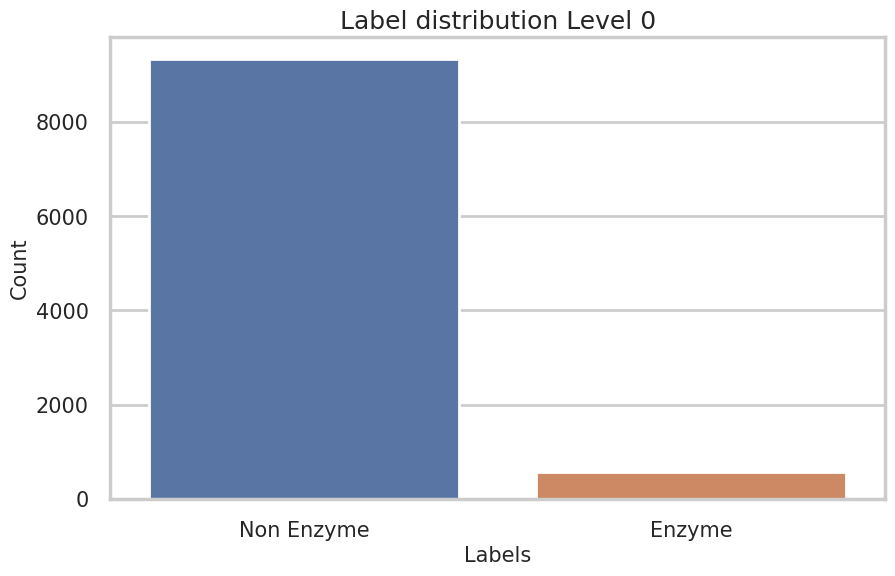

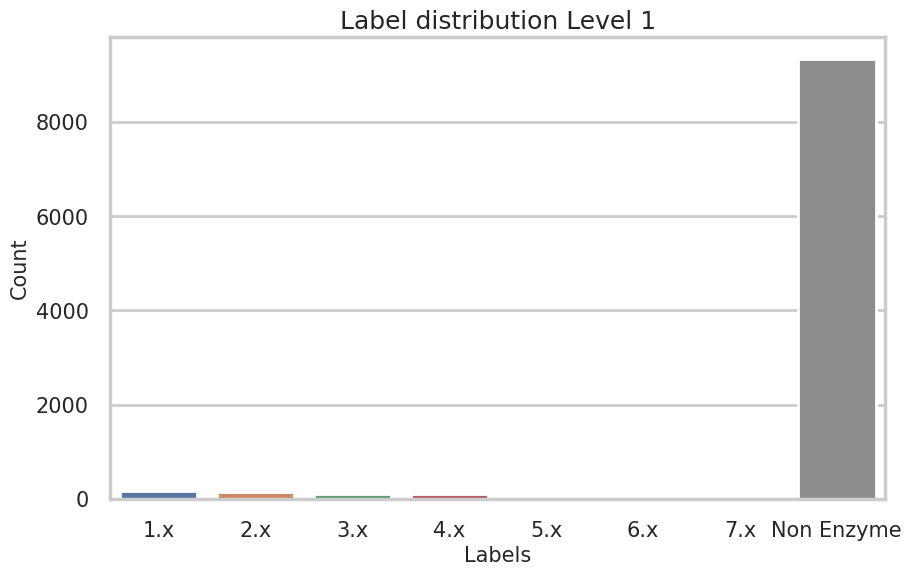

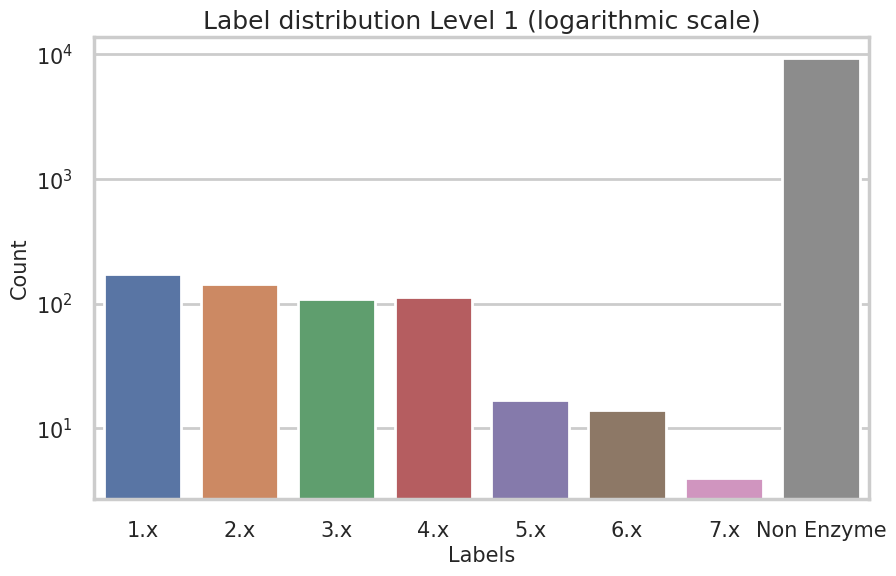

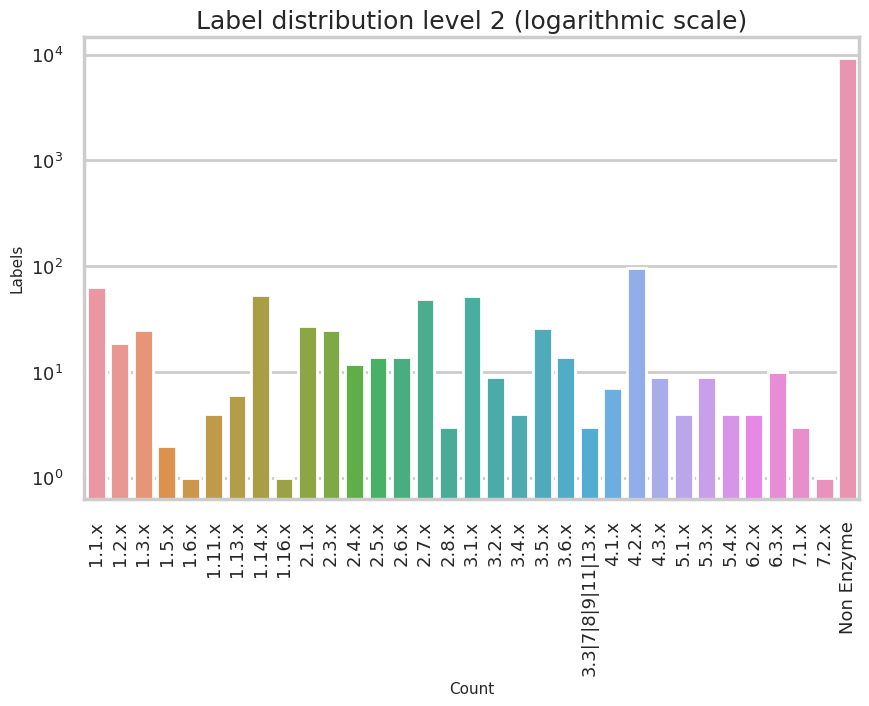

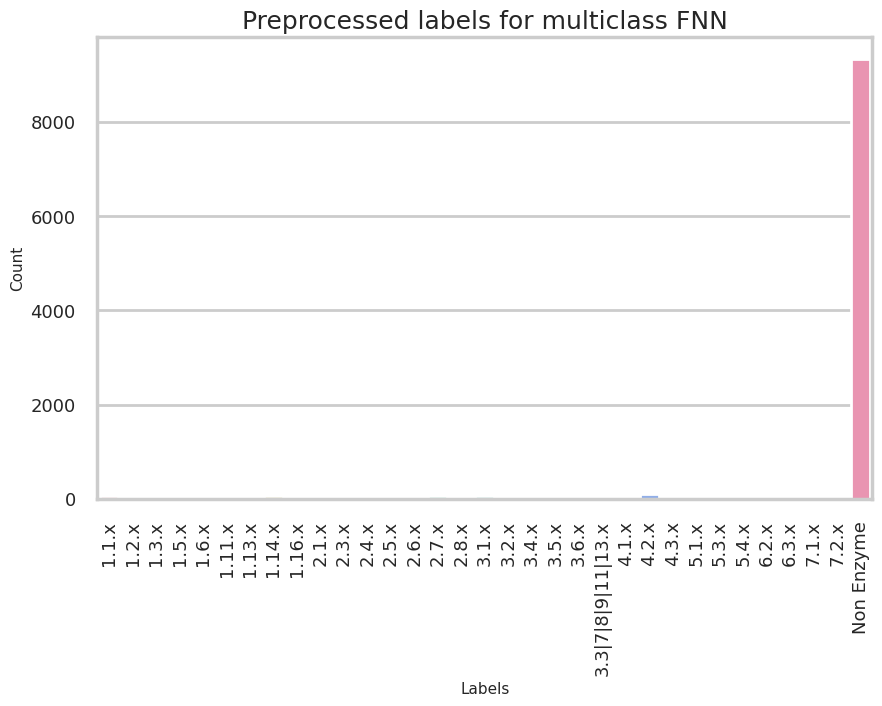



			[ MAKING PREDICTIONS ]

			
310/310 [==============================] - 1s 2ms/step


			[ MAKING BASELINE PREDICTION ]

			


			[ PLOTTING CONFUSION MATRIX ]

			


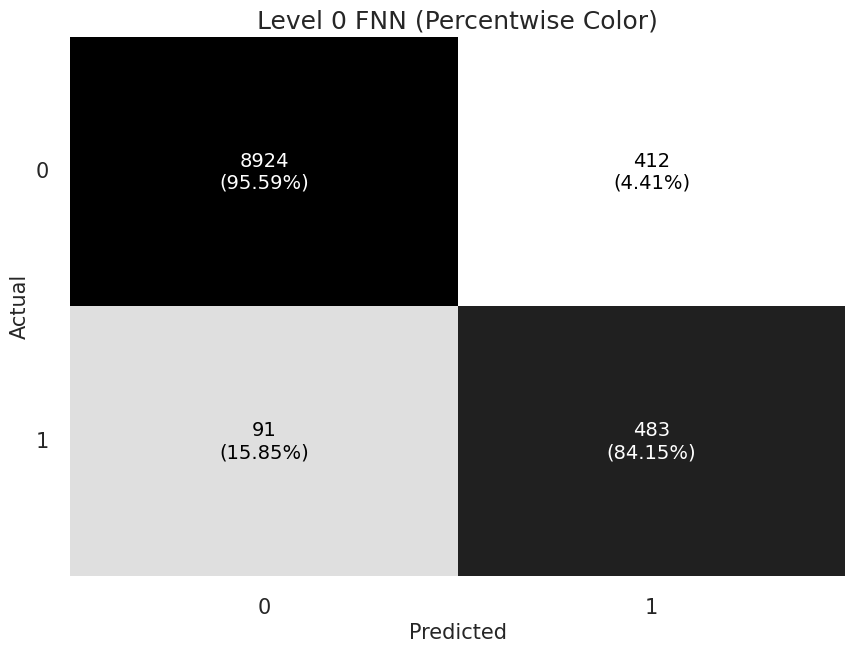

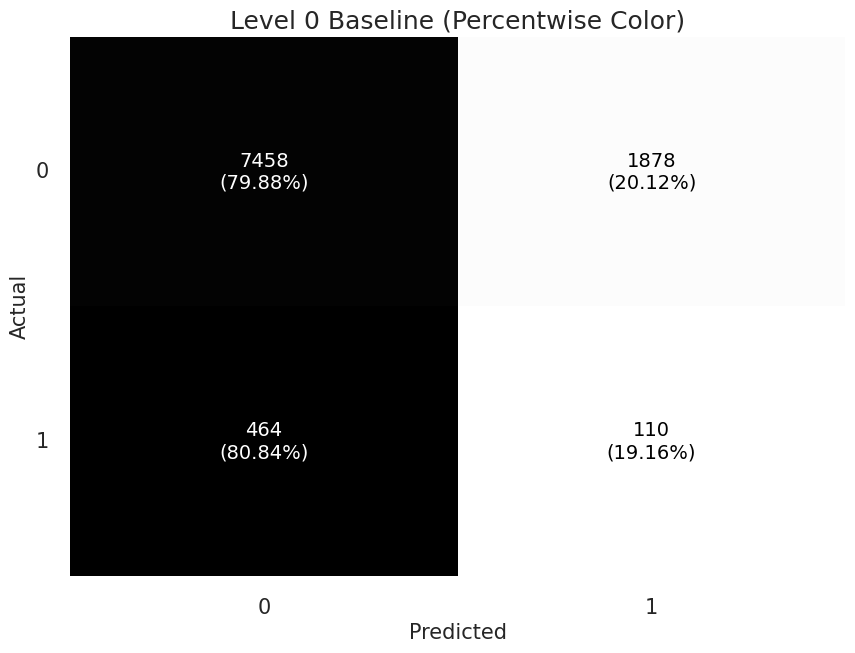

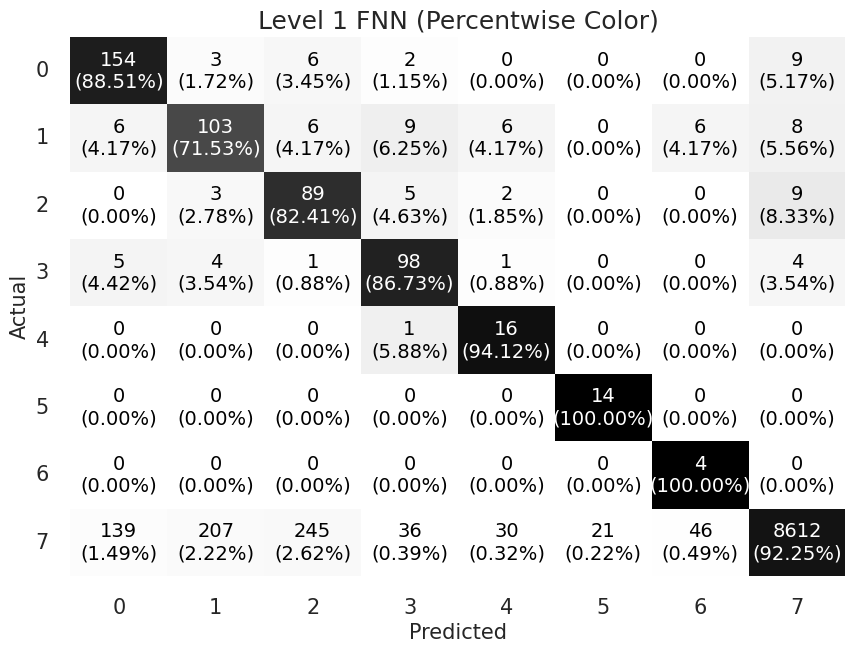

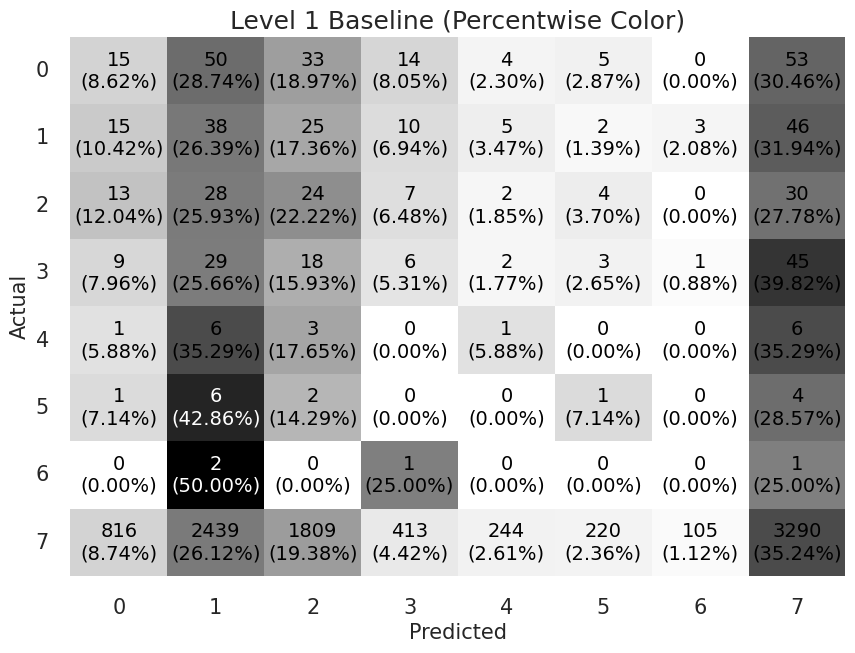

/tmp/ipykernel_51846/1340686063.py:199: RuntimeWarning: invalid value encountered in divide
  conf_matrix_percent = (conf_matrix.T / row_sums).T * 100


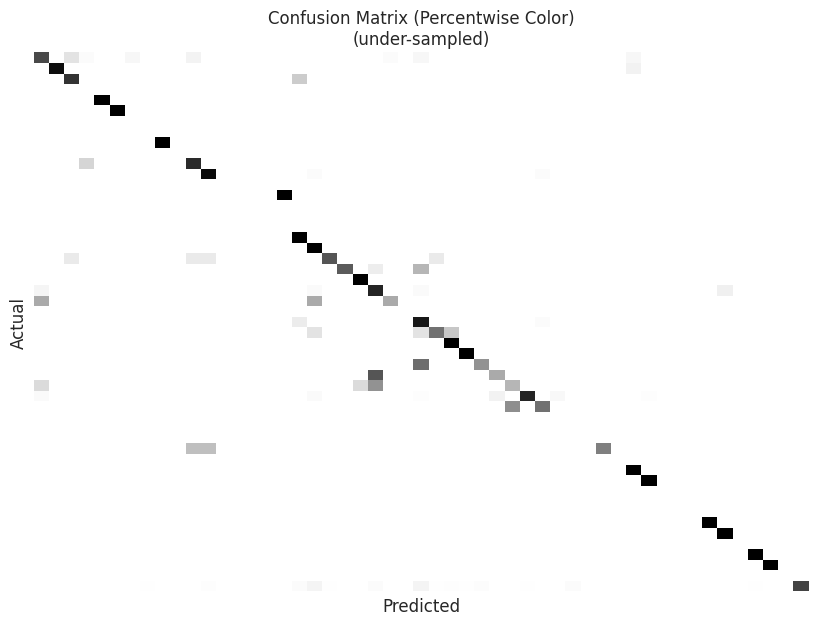

/tmp/ipykernel_51846/1340686063.py:211: RuntimeWarning: invalid value encountered in divide
  conf_matrix_percent = (conf_matrix.T / row_sums).T * 100


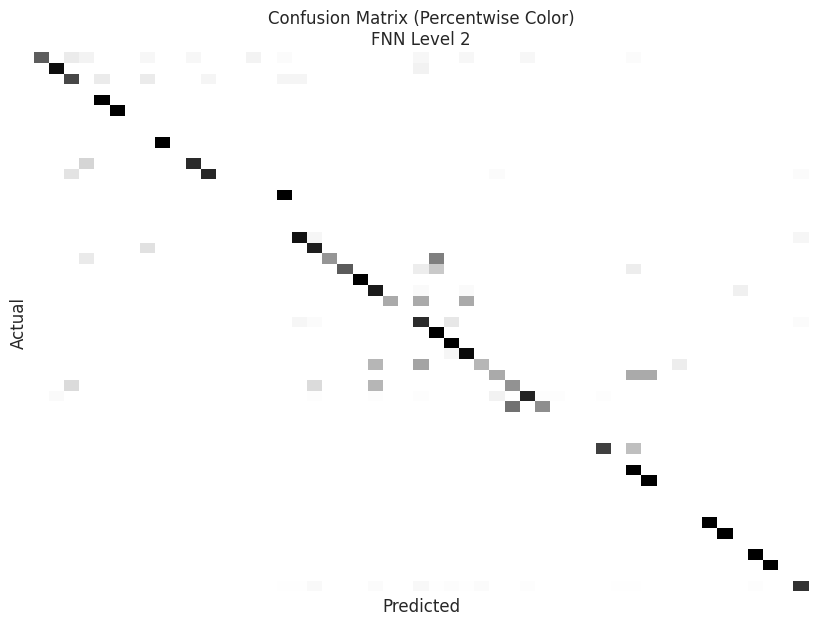

/tmp/ipykernel_51846/1340686063.py:224: RuntimeWarning: invalid value encountered in divide
  conf_matrix_percent = (conf_matrix.T / row_sums).T * 100


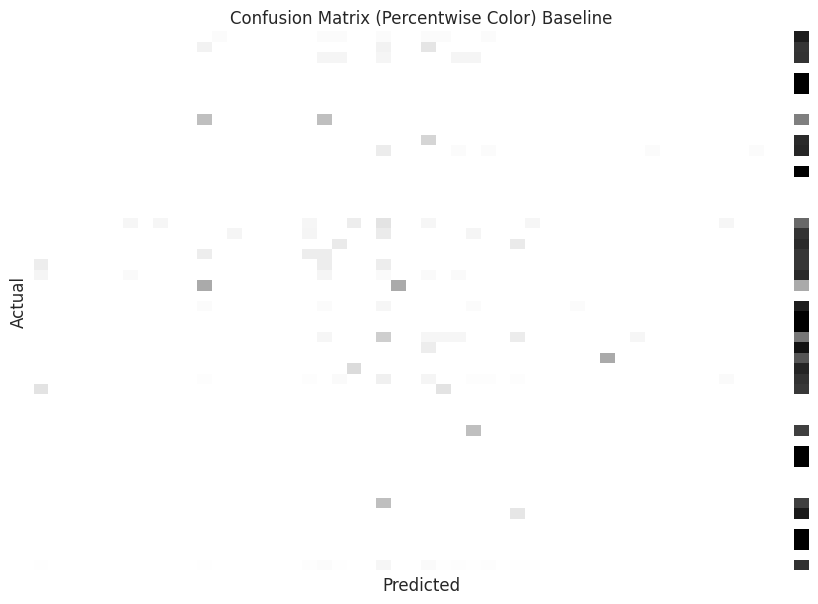



			[ PLOTTING SCORES ]

			
               Model             Metric  Mean Score      SE      CI_0  \
0        FNN Level 0  Weighted F1-Score       0.954  0.0019  0.950741   
1        FNN Level 0           Accuracy       0.949  0.0022  0.944803   
2        FNN Level 0     Macro F1-Score       0.815  0.0076  0.800126   
3        FNN Level 0                MCC       0.650  0.0140  0.621486   
0   Baseline Level 0  Weighted F1-Score       0.819  0.0037  0.811899   
1   Baseline Level 0           Accuracy       0.764  0.0043  0.755197   
2   Baseline Level 0     Macro F1-Score       0.475  0.0043  0.466892   
3   Baseline Level 0                MCC      -0.006  0.0099 -0.024683   
0        FNN Level 1  Weighted F1-Score       0.935  0.0020  0.930854   
1        FNN Level 1           Accuracy       0.917  0.0027  0.911907   
2        FNN Level 1     Macro F1-Score       0.540  0.0180  0.503913   
3        FNN Level 1                MCC       0.580  0.0120  0.556543   
0  Baseline Level 1  

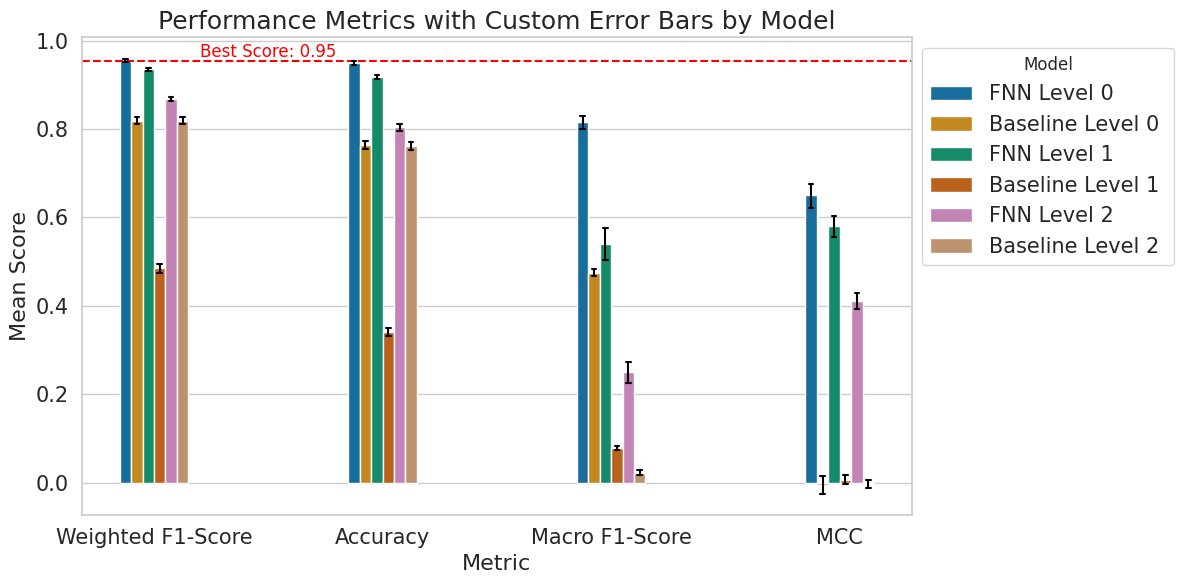

              Model             Metric  Mean Score      SE      CI_0      CI_1
0       FNN Level 0  Weighted F1-Score       0.954  0.0018  0.950646  0.957951
1       FNN Level 0     Macro F1-Score       0.815  0.0075  0.800291  0.829700
2       FNN Level 0     Micro F1-Score       0.949  0.0022  0.944803  0.953481
3       FNN Level 0           Accuracy       0.949  0.0022  0.944904  0.953481
4       FNN Level 0             Recall       0.899  0.0078  0.883215  0.913757
5       FNN Level 0          Precision       0.765  0.0084  0.748359  0.781143
6       FNN Level 0                MCC       0.650  0.0140  0.622303  0.676940
0  Baseline Level 0  Weighted F1-Score       0.819  0.0037  0.811982  0.826377
1  Baseline Level 0     Macro F1-Score       0.475  0.0043  0.466778  0.483680
2  Baseline Level 0     Micro F1-Score       0.764  0.0042  0.755399  0.771746
3  Baseline Level 0           Accuracy       0.764  0.0043  0.755197  0.772149
4  Baseline Level 0             Recall       0.495  

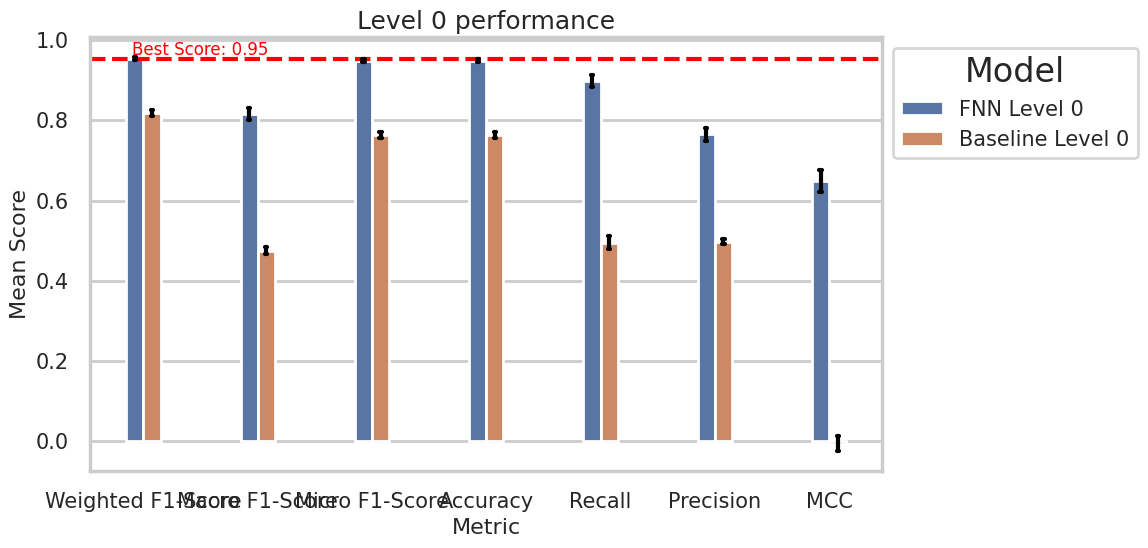

         Model             Metric  Mean Score      SE      CI_0      CI_1
0  FNN Level 1  Weighted F1-Score       0.935  0.0020  0.930830  0.938752
1  FNN Level 1     Macro F1-Score       0.540  0.0180  0.504117  0.573719
2  FNN Level 1     Micro F1-Score       0.917  0.0028  0.911804  0.922603
3  FNN Level 1           Accuracy       0.917  0.0027  0.911806  0.922704
4  FNN Level 1                MCC       0.580  0.0120  0.556483  0.603009
0      imp FNN  Weighted F1-Score       0.485  0.0053  0.474982  0.495553
1      imp FNN     Macro F1-Score       0.079  0.0022  0.074661  0.083296
2      imp FNN     Micro F1-Score       0.341  0.0047  0.331181  0.349647
3      imp FNN           Accuracy       0.341  0.0048  0.331080  0.350050
4      imp FNN                MCC       0.007  0.0053 -0.002846  0.017934


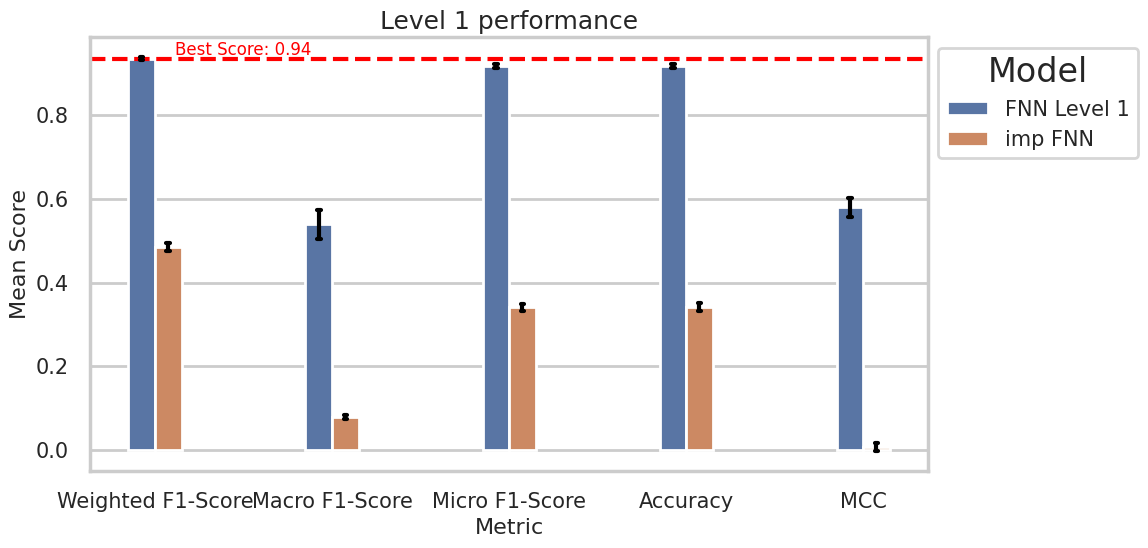

In [ ]:
validate_on_test_data_v1(path_to_test_csv=csv_path,
                         path_to_test_esm2=emb_path,
                         path_to_non_ez_esm2=emb_non_ez_path,
                         path_to_non_ez_fasta=fasta_path,
                         path_to_binaryclass_model=bin_class_path,
                         path_to_multiclass_model=mul_class_path)

In [ ]:

emb_path = os.getenv("TEST_ESM2_ENZYMES")
csv_path = os.getenv("TEST_CSV_ENZYMES")

fasta_path = os.getenv("TEST_FASTA_NON_ENZYMES")
emb_non_ez_path = os.getenv("TEST_ESM2_NON_ENZYMES")


In [ ]:

# loead enzymes
X_enzymes, y_enzymes, label_to_ec = load_all_sub_classes(path_to_esm2=emb_path, path_to_enzyme_csv=csv_path, allowed_labels=comp_ec_to_label_non_ez)

# Load non_enzymes
X_non_enzymes, _ = load_non_enz_esm2(non_enzymes_fasta_path=fasta_path,
                                     non_enzymes_esm2_path=emb_non_ez_path)
del _




y_non_enzymes = np.array([51 for _ in range(len(X_non_enzymes))])


X_multiclass_1 = np.vstack((X_enzymes, X_non_enzymes))
y_multiclass_1 = np.hstack((y_enzymes, y_non_enzymes))


# depending on the model, the labels for non enzymes change
y_non_enzymes = np.array([0 for _ in range(len(X_non_enzymes))])
y_non_enzymes_level_one = np.array([7 for _ in range(len(X_non_enzymes))])


# read data and labels for level one (including none enzymes
_, y_level_one = load_ml_data_emb(path_to_esm2=emb_path, path_to_enzyme_csv=csv_path)
y_level_one = np.hstack((y_level_one, y_non_enzymes_level_one))

# X_non_enzymes = X_non_enzymes[:1000] 
# y_non_enzymes = y_non_enzymes[:1000] 

# Combine data
X_binary = np.vstack((X_enzymes, X_non_enzymes))
y_binary = [1 for _ in y_enzymes]
y_binary.extend(y_non_enzymes)
y_binary = np.array(y_binary)


In [25]:
multiclass_model_all_samples = tf.keras.models.load_model("/home/malte/01_Documents/projects/pbl_binary_classifier/tf_cnn_esm2/2nd_ec_class_pred/Models/1512_all_non_ez_level_2_v2.keras")

level_2_pred_all_samples = np.argmax(multiclass_model_all_samples.predict(X_multiclass_1), axis=-1)


310/310 [==============================] - 1s 2ms/step


In [26]:
print(level_2_pred_all_samples.shape)
print(y_multiclass_1.shape)


(9910,)
(9910,)


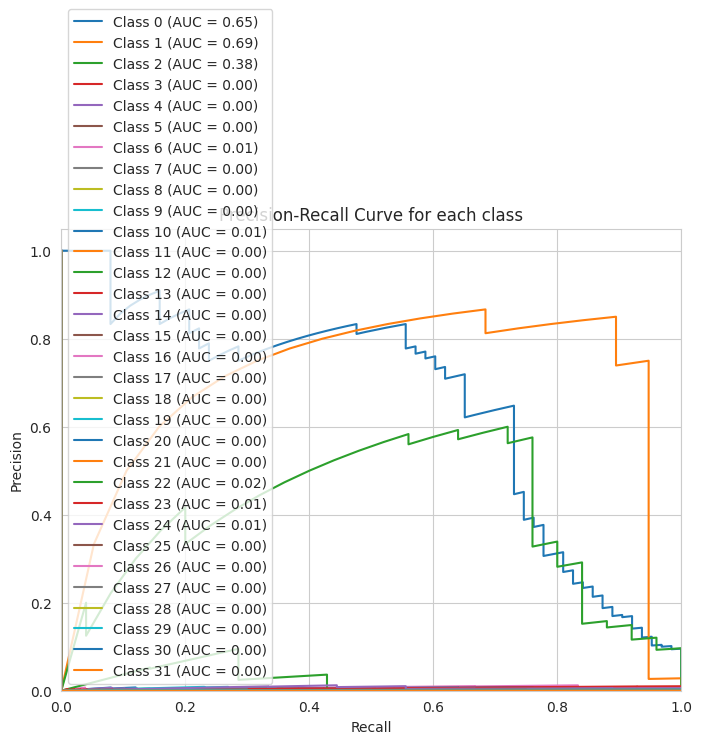

In [22]:
# Binarize the labels (one-hot encoding)
y_true_bin = label_binarize(y_multiclass_1, classes=list(set(y_multiclass_1)))  # Replace your_class_labels with your specific class labels

# Initialize variables to store precision, recall, and AUC for each class
precision = dict()
recall = dict()
auc_prc = dict()

for i in range(len(set(y_multiclass_1))-1):
    precision[i], recall[i], _ = precision_recall_curve(y_true_bin[:, i], level_2_pred_all_samples[:, i])
    auc_prc[i] = auc(recall[i], precision[i])

# Plot Precision-Recall Curves for each class
plt.figure(figsize=(8, 6))

for i in range(len(set(y_multiclass_1))-1):
    plt.plot(recall[i], precision[i], label=f'Class {i} (AUC = {auc_prc[i]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for each class')
plt.legend(loc='best')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()


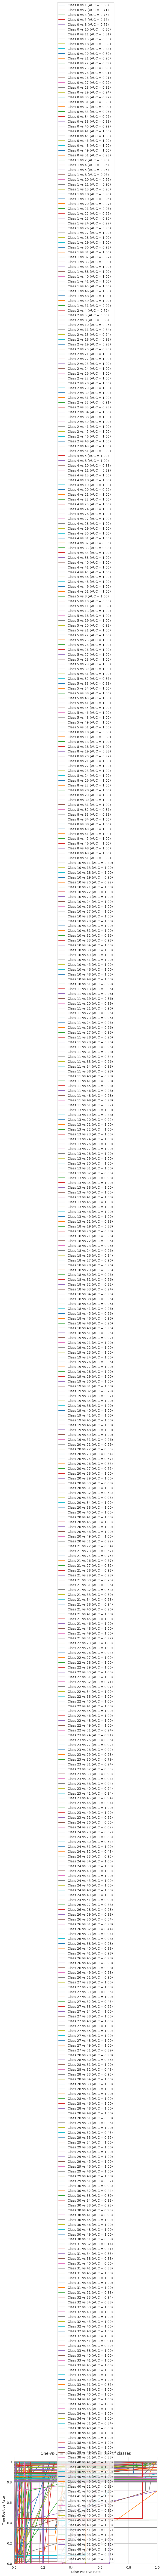

In [27]:
from sklearn.metrics import roc_curve, auc
from itertools import combinations
# Define the combinations of classes for One-vs-One
class_combinations = list(combinations(set(y_multiclass_1), 2))

# Initialize variables to store False Positive Rate, True Positive Rate, and AUC for each pair of classes
fpr = dict()
tpr = dict()
roc_auc = dict()

for i, (class1, class2) in enumerate(class_combinations):
    # Select samples belonging to only class1 and class2
    indices = (y_multiclass_1 == class1) | (y_multiclass_1 == class2)
    y_binary = y_multiclass_1[indices]
    y_true_bin = label_binarize(y_binary, classes=[class1, class2])
    y_scores = level_2_pred_all_samples[indices]

    # Compute ROC curve and ROC area for each pair of classes
    fpr[i], tpr[i], _ = roc_curve(y_true_bin, y_scores)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot OvO ROC Curves for each pair of classes
plt.figure(figsize=(8, 6))

for i, (class1, class2) in enumerate(class_combinations):
    plt.plot(fpr[i], tpr[i], label=f'Class {class1} vs {class2} (AUC = {roc_auc[i]:.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('One-vs-One ROC Curve for each pair of classes')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()

In [30]:
roc_auc = {}

# Calculate AUC for each AvA ROC curve
for i, (class1, class2) in enumerate(class_combinations):
    roc_auc[i] = auc(fpr[i], tpr[i])

average_auc = sum(roc_auc.values()) / len(roc_auc)
print(f"Average AUC: {average_auc:.4f}")

Average AUC: 0.9356


{0: 0.6491228070175439,
 1: 0.7126984126984126,
 2: 0.7619047619047619,
 3: 0.7619047619047619,
 4: 0.7936507936507936,
 5: 0.7976190476190476,
 6: 0.8140161725067385,
 7: 0.8809523809523809,
 8: 0.8930041152263374,
 9: 0.8755555555555555,
 10: 0.8921957671957672,
 11: 0.9041950113378684,
 12: 0.8888888888888888,
 13: 0.8969873663751214,
 14: 0.91005291005291,
 15: 0.9072039072039071,
 16: 0.9206349206349206,
 17: 0.9206349206349206,
 18: 0.9358974358974359,
 19: 0.9206349206349206,
 20: 0.9814814814814814,
 21: 0.8854875283446711,
 22: 0.9587628865979381,
 23: 0.9664902998236331,
 24: 0.986111111111111,
 25: 0.992063492063492,
 26: 1.0,
 27: 1.0,
 28: 1.0,
 29: 1.0,
 30: 1.0,
 31: 0.982264421049768,
 32: 0.9473684210526316,
 33: 0.9473684210526316,
 34: 0.9473684210526316,
 35: 0.9473684210526316,
 36: 0.9473684210526316,
 37: 0.9493545183714003,
 38: 0.9473684210526316,
 39: 0.9493177387914231,
 40: 0.9473684210526316,
 41: 0.9736842105263158,
 42: 0.9642857142857143,
 43: 0.94736842